<center>*TA contact info*</center>

<center>
I am available for all programming and math-related questions throughout the course. The best way to contact me is by email:</center>

<center>**deverett@princeton.edu**</center>

---

# Lab #2

Last class, we learned about the basics of Python programming, including variables, lists, loops, and if statements. 

Today, we will build on that knowledge, jumping forward to look at functions, Python packages, and then at the Twitter API.

*Note: if you didn't manage to attend the Intro to Plotting session, <a href="https://drive.google.com/open?id=0B2N8L8DcfG0NMHFoaXBjZERTY28">here is the notebook</a>.*

In [7]:
# a couple of useful tricks:

print( 5 in [1, 2, 3] )
print( 5 in [1, 2, 5] )

sentence = 'hello,this,is,a,sentence'

split_sentence = sentence.split(',')
print ( split_sentence )

joined_sentence = 'X'.join(split_sentence)
print ( joined_sentence )

print( 'There are', sentence.count(','), 'commas in the sentence' )
print( 'There are', split_sentence.count(','), 'commas in the list of words' )

False
True
['hello', 'this', 'is', 'a', 'sentence']
helloXthisXisXaXsentence
There are 4 commas in the sentence
There are 0 commas in the list of words


---

## Functions

A function is simply a block of general-purpose code that can be run by calling its name.

In most cases, this block of code can take some inputs, do its job on them, and then return some outputs.

Let's look at a simple function:

In [2]:
def add(x, y):
    result = x + y
    return result

In [3]:
a = 3
b = 4

z = add(a, b)

print(z)

7


In the previous example, `x` and `y` are **parameters** (also known as **arguments**) to the `add` function.

Two other important concepts about functions:
* default values for parameters
* returning multiple objects

In [4]:
def split_string(string, n=2):
    """Split a string into n chunks
    
    Parameters
    ----------
    string : str
        the string to be split
    n : int
        the number of chunks into which to split the string
        
    Returns
    -------
    chunks : a list of individual chunks made by splitting string
    """
    if len(string) % n != 0:
        print('Length of string is not divisible by n; expect some letters to be cut off.')
    
    chunk_size = len(string)//n
    chunks = []
    for i in range(n):
        chunk = string[i*chunk_size : i*chunk_size + chunk_size]
        chunks.append(chunk)
    return chunks

In [6]:
print( split_string('hello world!', 5) )

Length of string is not divisible by n; expect some letters to be cut off.
['he', 'll', 'o ', 'wo', 'rl']


  <font color='green'>   
**Exercise**: Write a function that takes as parameters 3 strings and returns the answer to the question: "are the lowercase versions of these 3 strings all the same?"
 </font>

---

## Python packages

Technically, it is possible for you to do almost any analysis using just what we have learned already in Python. But as you can imagine, some complex tasks would take years to achieve, including millions of lines of code.

Fortunately, many generous developers have wrriten general-purpose code in the form of "packages." Many such packages are free, widely available, and strictly maintained, so that we can use them and rely on them.

Today we will look briefly at 2 such packages that are very popular in scientific computing: `numpy` and `pandas`.

At the end, we will learn about a relatively new and useful package called `tweepy`, which will allow us to interact with Twitter.

### NumPy

`numpy` is the numerical computing package for numpy. One of the most confusing topics for beginner Python programmers comes with the introduction of `numpy`. In this course, we will only make limited use of `numpy`, but it is very important to know.

To import numpy (or any package), we use this syntax:

In [ ]:
import numpy as np

This command makes all of the `numpy` functionality available to us under the shortcut name `np`.

The primary concept to understand with `numpy` is the `array`. Arrays act very much like Python lists, which we learned last week. But, arrays are specialized for math.

A `numpy` array can be created from any list, like this:

In [9]:
my_list = [5, 10, 11, 32]
my_array = np.array(my_list)

# or, equivalently:

my_array = np.array([5, 10, 11, 32])

To understand the difference between lists and arrays, consider the following cells:

In [10]:
print( my_list * 2 )

[5, 10, 11, 32, 5, 10, 11, 32]


In [11]:
print( my_array * 2 )

[10 20 22 64]


In [12]:
print( my_list + 2 )

TypeError: can only concatenate list (not "int") to list

In [13]:
print( my_array + 2 )

[ 7 12 13 34]


You now understand the claim that `numpy` arrays are specialized for math.

You can always check the size and dimensions of an array using the `shape` attribute.

In [14]:
print( my_array.shape )

(4,)


`numpy` offers a function similar to `range`, but that handles decimal numbers:

In [15]:
my_range = np.arange(0, 1000, 0.1)

print(my_range)

[  0.00000000e+00   1.00000000e-01   2.00000000e-01 ...,   9.99700000e+02
   9.99800000e+02   9.99900000e+02]


`numpy` also has functions for producing arrays of random numbers:

In [17]:
my_rand = np.random.random(10000)

my_normal = np.random.normal(0, 1., size=10000)

<IPython.core.display.Javascript object>


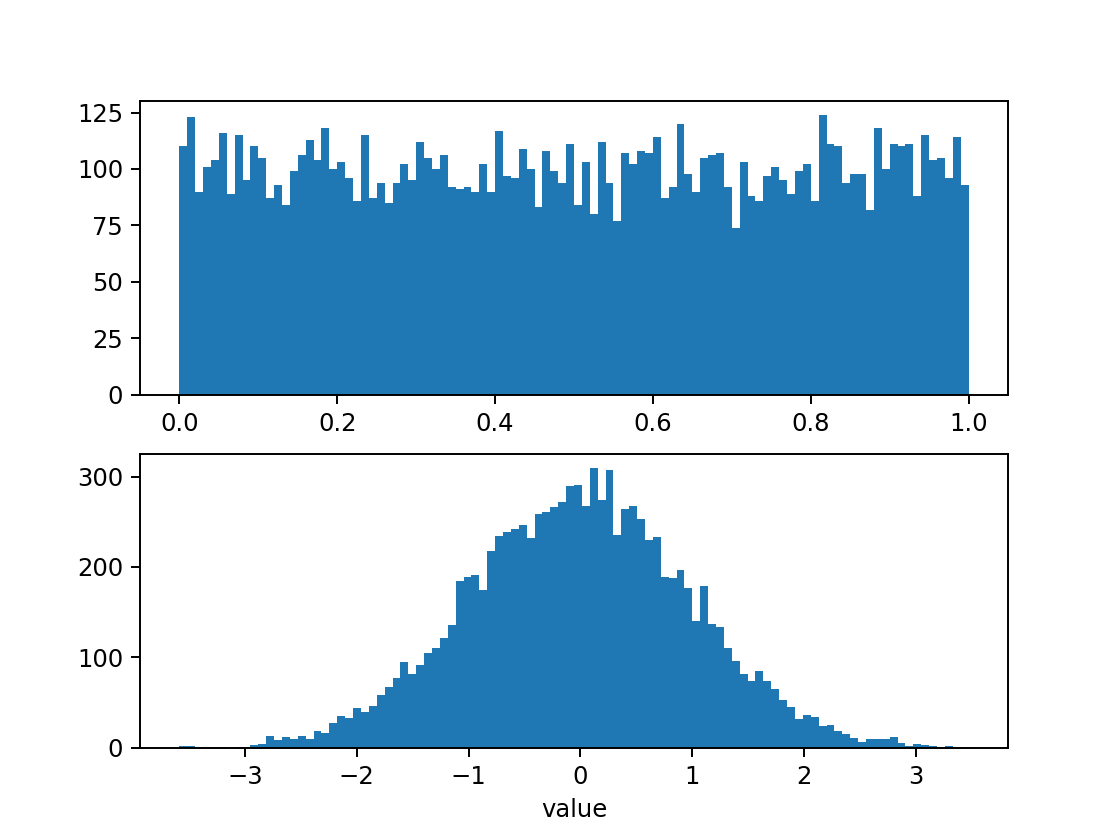

In [19]:
import matplotlib.pyplot as pl
pl.style.use('default')
%matplotlib notebook

fig,axs = pl.subplots(2,1)
axs[0].hist(my_rand, bins=100)
axs[1].hist(my_normal, bins=100)

axs[1].set_xlabel('value')

Because `numpy` is a math package, lots of important mathematical functions are implemented:

In [20]:
mean = np.mean(my_rand)
print('Mean is', mean)

std = np.std(my_rand)
print('Standard deviation is', std)

var = np.var(my_rand)
print('Variance is', var)

Mean is 0.499795554422
Standard deviation is 0.291517513224
Variance is 0.0849824605163


Arrays are not limited to one dimension; in fact, they can be any number of dimensions. It is common to represent matrices of data using a 2D `numpy` array:

In [21]:
my_matrix = np.ones([8,12])

print('The shape of this matrix is: ', my_matrix.shape)
print(my_matrix)

The shape of this matrix is:  (8, 12)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


As we learned, when you index lists, you can retrieve or set the n'th element using:

`my_list[n]`

For 2-dimensional arrays, that convention is extended as follows:

`my_array[row_index, column_index]`

In other words, the rows of a 2D matrix are the first **axis**, and the columns are the second **axis**.

In [ ]:
top_left_element = my_matrix[0,0]

first_row = my_matrix[0,:]

first_column = my_matrix[:,0]

<font color='green'>   
**Exercise**: create a 2D array in which the values of all elements are 42. Then, set just the diagonal elements to be 0.
</font>

In [ ]:
# (one possible) solution:



When an array has more than 1 dimension, the default behavior for functions like `np.mean` is to compute it over all the data. But, one of the optional parameters to those functions is `axis`. This allows you to compute a statistic, like mean, for all rows, or columns of your data:

In [ ]:
mean_of_rows = np.mean(my_matrix, axis=1)

print(mean_of_rows.shape)

In [ ]:
mean_of_columns = np.mean(my_matrix, axis=0)

print(mean_of_columns.shape)

`numpy` arrays can be saved to files and loaded back into Python.

In [ ]:
np.save('my_array_file.npy', my_matrix)

In [ ]:
my_loaded_data = np.load('my_array_file.npy')

Furthermore, `numpy` arrays can be saved to and loaded from CSV files too:

In [ ]:
np.savetxt("my_data.csv", my_matrix, delimiter=",")

In [ ]:
my_data = np.genfromtxt('my_data.csv', delimiter=',')

<font color='green'>   
**Exercise**: 

The file "temperature_anomalies.npy" contains a `numpy` array. The rows represent years, from 1880 through 2016. The columns represent months, January through December. The values represent the temperature anomaly in the given month and year, gathered from <a href="https://www.ncdc.noaa.gov/cag/data-info/global">this source</a>.  
 
<ul>

<li>Load the temperature data into Python
<li>Compute the mean and standard deviation of the temperature anomaly for each year
<li>Compute the mean and standard deviation of the temperature anomaly by month, averaged over years 
<li>Bonus: plot these trends and comment on the meaning of the finding

</ul>
</font>

### Pandas

Whereas `numpy` is the go-to package for math in Python, `pandas` is another popular package used for analyzing timeseries and tabular data.

To be clear, `pandas` is built *on top* of `numpy`, so if you have a `pandas` object, it usually has all the available functions that a `numpy` array would. That is one of the reasons that knowing `numpy` is so important.

For our purposes, the `pandas` DataFrame is the most important object with which to be familiar. It is basically a 2D numpy array, but it has some special properties, like names for the columns.

In [30]:
import pandas as pd

people = pd.DataFrame(columns=['name', 'age', 'is_female', 'height'])

people.loc[:,'name'] = ['Adam','Bart','Cynthia', 'Dolores', 'Edwin', 'Frances']
people.loc[:,'age'] = [22, 21, 22, 22, 20, 21]
people.loc[:,'is_female'] = [False, False, True, True, False, True]
people.loc[:,'height'] = [5.8, 5.9, 5.8, 5.7, 6., 5.5]

people

,name,age,is_female,height
0,Adam,22,False,5.8
1,Bart,21,False,5.9
2,Cynthia,22,True,5.8
3,Dolores,22,True,5.7
4,Edwin,20,False,6.0
5,Frances,21,True,5.5


In [31]:
people.loc[2,'name'] = 'Zorba'

people

,name,age,is_female,height
0,Adam,22,False,5.8
1,Bart,21,False,5.9
2,Zorba,22,True,5.8
3,Dolores,22,True,5.7
4,Edwin,20,False,6.0
5,Frances,21,True,5.5


Because DataFrames are basically just fancy arrays, we can always retrieve their raw values:

In [32]:
print(people.values)

[['Adam' 22 False 5.8]
 ['Bart' 21 False 5.9]
 ['Zorba' 22 True 5.8]
 ['Dolores' 22 True 5.7]
 ['Edwin' 20 False 6.0]
 ['Frances' 21 True 5.5]]


`pandas` offers a suite of very useful features, such as the ability to group your table by a property, and compute statistics over the other properties for each group.

In [33]:
people.groupby('age').mean()

,is_female,height
age,,
20,0.000000,6.000000
21,0.500000,5.700000
22,0.666667,5.766667


DataFrames can also be saved and read to and from csv files:

In [ ]:
people.to_csv('people.csv')

In fact, pandas even offers functions to save and read Excel files:

In [ ]:
people.to_excel('people.xls')

<font color='green'>   
**Exercise**: the file `2016_donations.csv` contains approximately one million records of campaign donations from individuals in the 2015 and 2016 election cycles (they are real data from <a href="http://www.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016">this source</a>).

* Load the data into a pandas DataFrame
* Print the number of individual unique donors in the list
* Print the average donation amount
* Create a new table in which there is one row per state, and the columns are the mean, standard deviation, minimum, and maximum donations for that state
* Save your new table to an Excel spreadsheet or CSV file


### tweepy

Many companies and services offer API's: Application Program Interfaces. These are basically a set of standard commands you can use to query the company's database and retrieve information that you want.

Twitter has an excellent API, and developers have built Python-accessible bindings for it, such that we can use Python to retrieve publicly available tweets.

All that's required in order to do this is a set of keys provided by Twitter to anyone who requests them.

<br/>
<font color='green'> 
    **Exercise**: 

    <ul>
    <li> in a terminal window, run `pip install tweepy`
    <li> go to https://apps.twitter.com </li>
    <li> Create New App, with content of your choosing </li>
    <li> Go to Keys and Access Tokens, Create My Access Token</li>
    <li> In the next code cell, define 4 variables for your:
        <ul>
        <li> API Key </li>
        <li> API Secret </li>
        <li> Access Token </li>
        <li> Access Token Secret </li>
        </ul>
    </li>
    </ul>

</font>


In [22]:
api_key = 'kIrE1akPytCbN6dtfZoxmCmU3'
api_secret = 'EnztGXvO3QDRWGAJZVV6UGrb0pT9EY3D9R9uSmtp1BuZFoMFZQ'
access_token = '96322197-bzzWFgpdpQD4cFFdqLEEhfhl2t3zhlYhqYFUWf70x'
access_token_secret = 'vF1nsbQzJeHOdDaFTNy0EREk7UVaDupehPaAZ5vNx5ZBn'

import tweepy as tw

auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [24]:
n_posts = 15

for tweet in tw.Cursor(api.home_timeline).items(n_posts):
    author = tweet.author.name
    sname = tweet.author.screen_name
    text = tweet.text
    
    print('{} (@{})\n{}\n'.format(author, sname, text))

The Economist (@TheEconomist)
Virginia: a rights battleground https://t.co/EfFN49vrOc

The Economist (@TheEconomist)
David Friedman is a controversial pick for a position as sensitive as America's ambassador to Israel https://t.co/yyB3CWNZ01

The Globe and Mail (@globeandmail)
Fraser Institute challenges revenue-neutral claim of B.C.’s carbon tax https://t.co/BBGgBsFHjZ From @GlobeBC

BBC Breaking News (@BBCBreaking)
BBC Exclusive: Facebook chief Mark Zuckerberg tells @BBCKamal of his concerns the tide is turning on globalisation

https://t.co/8aUVu3is9V

Neuroscience News (@NeuroscienceNew)
Social Exclusion Leads to Conspiratorial Thinking https://t.co/ciRtiOn0g3 #conspiracytheories #conspiracy #psychology #neuroscience #science

NPR (@NPR)
3,000-Pound Rooster Statue Stolen From North Carolina Farm https://t.co/Fi2SIzzZce

New Scientist (@newscientist)
Turn satellites into sparkling fireworks to burn up space junk https://t.co/8SEisN8nXA https://t.co/pCqBp2M5aa

The Atlantic (@TheAtla

The API gives us the ability to search Twitter, just like the search bar on the website itself.

In [26]:
for tweet in tw.Cursor(api.search, q='meltdown', lang='en').items(10):
    print(tweet.text, '\n')

RT @rodemmerson: Cadbury meltdown - in today's @nzherald #bushfire @Cadbury_NZ #jobs https://t.co/pcWSILVRhS 

RT @TransferRelated: Arsenal Fan TV went into meltdown last night 🔥 https://t.co/aHwkyKvnub 

@realDonaldTrump U had a meltdown in front of the entire nation and world. They watched a little child have a tantrum in front of a podium!! 

@sir_mycroft @tim_tlyons @thatgayhipster Borrowing money is what helped get us out of an economic meltdown. 

Meltdown https://t.co/cq3LWzywJM 

Tyrese Trump Meltdown - Fast &amp; Furious Actor Begs Patriots to Skip White... https://t.co/TKxysgoqjh via @YouTube #liberallunacy 

RT @froomkin: Nothing on the NYT homepage even hints at the fact that the President of the United States had a total meltdown. https://t.co… 

The Trump meltdown... 

@jahimes @kasie @MSNBC @realDonaldTrump meltdown 

@chucktodd is currently in meltdown mode https://t.co/ysijRmaMVu 



In [29]:
# note that the query can be a list of terms

for tweet in tw.Cursor(api.search, q=['spicer', 'trump'], lang='en').items(10):
    print(tweet.text, '\n')

RT @michaelianblack: "Comparatively speaking, Sean Spicer is actually pretty good at his job," me watching Trump's press conference. 

RT @mrwalsh8: Here's Spicer and Conway when Trump tells Jim Acosta that CNN is not just "fake news," they are "very fake news." https://t.c… 

RT @JOE_co_uk: President Trump and Sean Spicer have an important announcement about #FAKENEWS.... https://t.co/Gkzhe4pqP0 

RT @mrwalsh8: Here's Spicer and Conway when Trump tells Jim Acosta that CNN is not just "fake news," they are "very fake news." https://t.c… 

Trump has raised the sass bar so high, Sean Spicer's next press briefing will be outdoors. https://t.co/QLIsxBMIBq 

RT @mrwalsh8: Here's Spicer and Conway when Trump tells Jim Acosta that CNN is not just "fake news," they are "very fake news." https://t.c… 

RT @michaelianblack: "Comparatively speaking, Sean Spicer is actually pretty good at his job," me watching Trump's press conference. 

RT @bennyjohnson: Look at Spicer and Kellyanne when Trump te

In [ ]:
tweet.

The available options for the Twitter API's search functionality is documented <a href="https://dev.twitter.com/rest/public/search">here</a>.

An important limitation to know is that the Twitter search API does not let you search arbitrarily far back in time on all of Twitter (because it is not feasible on their end). It does, however, let you scroll through a given user's timeline without limit, and it does allow you to search all of Twitter from ~1 week ago until the present moment.

Also note that Twitter <a href="https://dev.twitter.com/rest/public/rate-limiting">imposes a limit</a> on the rate at which you can query the API, set at 15 queries within a given 15-minute window. When you do the following exercise, you'll want to first ensure that you have a reliable way to store the tweets you retrieve, so that you don't waste your API calls.  
  
<font color='green'>   
**Exercise**: 

Consider this list of 10 keywords:
<ul>
<li> trump
<li> spicer
<li> conway
<li> russia
<li> alzheimer
<li> neuron
<li> memory
<li> superbowl
<li> beatles
</ul>

<ol>
<li>For each keyword, retrieve 1000 unique tweets that contain the keyword. 
<li> Save those tweets into a `pandas` DataFrame, and save that DataFrame to a file.
<li> For each pairwise comparison of the 10 keywords (100 comparisons), compute the proportion of tweets containing keyword A that also contain keyword B. 
<li>Store the results in a 2D `numpy` matrix or a `pandas` DataFrame, and save the data to a file.

<li> Bonus: display and save a pseudocolor plot to visualize this co-occurence data.

</ol>

</font>
